In [1]:
%matplotlib inline
import pandas as pd
liver = pd.read_csv('/data/indian_liver_patient.csv')

# Single Grouping Field

In [2]:
liver.groupby("Gender").count()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Gender,,,,,,,,,,
Female,142,142,142,142,142,142,142,142,140,142
Male,441,441,441,441,441,441,441,441,439,441


In [3]:
liver.groupby("Gender").count().reset_index()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,142,142,142,142,142,142,142,142,140,142
1,Male,441,441,441,441,441,441,441,441,439,441


In [4]:
liver.groupby("Gender", as_index=False).count()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,142,142,142,142,142,142,142,142,140,142
1,Male,441,441,441,441,441,441,441,441,439,441


# Grouping by Multiple Fields at Once

In [5]:
liver.groupby(["Gender","Age"], as_index=False).count()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,7,1,1,1,1,1,1,1,1,1
1,Female,8,1,1,1,1,1,1,1,1,1
2,Female,10,1,1,1,1,1,1,1,1,1
3,Female,13,2,2,2,2,2,2,2,2,2
4,Female,17,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
116,Male,73,2,2,2,2,2,2,2,2,2
117,Male,74,2,2,2,2,2,2,2,2,2
118,Male,75,12,12,12,12,12,12,12,12,12
119,Male,78,1,1,1,1,1,1,1,1,1


# Common Custom Grouping Procedure

1. Create the new field you want to group by
2. Group by

In [6]:
liver["Decade"] = liver["Age"] // 10

In [7]:
liver.groupby("Decade").count()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Decade,,,,,,,,,,,
0,6,6,6,6,6,6,6,6,6,6,6
1,32,32,32,32,32,32,32,32,32,32,32
2,67,67,67,67,67,67,67,67,67,66,67
3,120,120,120,120,120,120,120,120,120,119,120
4,128,128,128,128,128,128,128,128,128,127,128
5,97,97,97,97,97,97,97,97,97,96,97
6,92,92,92,92,92,92,92,92,92,92,92
7,38,38,38,38,38,38,38,38,38,38,38
8,2,2,2,2,2,2,2,2,2,2,2


# Custom Age Buckets

0-18, 19-44, 45-64, 65-84, and 85

1. Create a function that generates the grouping buckets you need
2. Set your input field to be the data frame index
3. Create a groupby using your custom function

In [8]:
# 1. Create a function to generate teh grouping buckets
#    Note that the labels here are prefixed with a letter to make them more easily sortable.
#    There's also an "unknown" that sorts at the bottom as Z

def cms_ages(age):
    ranges = [
        {'min': 0,  'max': 18,  'label': 'A.  0-18'},
        {'min': 19, 'max': 44,  'label': 'B. 19-44'},
        {'min': 45, 'max': 64,  'label': 'C. 45-64'},
        {'min': 65, 'max': 84,  'label': 'D. 65-84'},
        {'min': 85, 'max': 999, 'label': 'E. 85-up'}
    ]
        
    for r in ranges:
        if age >= r.get('min') and age <= r.get('max'):
            return r.get('label')
    
    return 'Z. Unknown'

In [ ]:
liver.head()

In [ ]:
liver.set_index('Age').head()  # Age becomes row index

In [9]:
by_cms_age = liver.set_index("Age").groupby(cms_ages)

In [10]:
by_cms_age.count()

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Decade
A. 0-18,36,36,36,36,36,36,36,36,36,36,36
B. 19-44,239,239,239,239,239,239,239,239,237,239,239
C. 45-64,231,231,231,231,231,231,231,231,229,231,231
D. 65-84,75,75,75,75,75,75,75,75,75,75,75
E. 85-up,2,2,2,2,2,2,2,2,2,2,2


In [13]:
by_cms_age.count().reset_index().rename(columns={'index':"Age Range"})

,Age Range,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Decade
0,A. 0-18,36,36,36,36,36,36,36,36,36,36,36
1,B. 19-44,239,239,239,239,239,239,239,239,237,239,239
2,C. 45-64,231,231,231,231,231,231,231,231,229,231,231
3,D. 65-84,75,75,75,75,75,75,75,75,75,75,75
4,E. 85-up,2,2,2,2,2,2,2,2,2,2,2


# Using a Categorical Series

Categories are a special data type that has a defined domain...  "Gender is always Male, Female, or Unknown"

In [24]:
gender_type = pd.CategoricalDtype(categories=["Female","Male","Unknown"], ordered=True)

In [25]:
liver = pd.read_csv('/data/indian_liver_patient.csv')

In [26]:
liver["Gender"] = liver["Gender"].astype(gender_type)

In [27]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
liver.count()

Age                           583
Gender                        583
Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    579
Dataset                       583
dtype: int64

In [ ]:
liver.fillna('Unknown', inplace=True)

In [19]:
liver.groupby("Gender", observed=False).count()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Gender,,,,,,,,,,
Female,142,142,142,142,142,142,142,142,140,142
Male,441,441,441,441,441,441,441,441,439,441
Unknown,0,0,0,0,0,0,0,0,0,0


# Grouping DateTime Fields


In [28]:
condemnations = pd.read_csv('/data/condemn.txt')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
condemnations.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [30]:
condemnations["InspectDate"].head()

0    1986-07-10 00:00:00
1    2009-07-23 00:00:00
2    2003-08-06 00:00:00
3    1996-06-17 00:00:00
4    2006-12-20 00:00:00
Name: InspectDate, dtype: object

In [31]:
condemn = condemnations[["InspectDate","Status"]]

In [32]:
condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'].astype(str), format='%Y-%m-%d')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
condemn.head()

,InspectDate,Status
0,1986-07-10,W
1,2009-07-23,B
2,2003-08-06,NaN
3,1996-06-17,W
4,2006-12-20,NaN


In [35]:
condemn.dtypes

InspectDate    datetime64[ns]
Status                 object
dtype: object

In [36]:
by_year = condemn.groupby(pd.Grouper(key="InspectDate", freq='Y'))

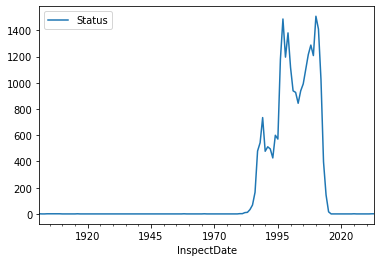

In [37]:
by_year.count().plot()

In [38]:
by_year.count().head()

,Status
InspectDate,
1901-12-31,1
1902-12-31,0
1903-12-31,0
1904-12-31,1
1905-12-31,1


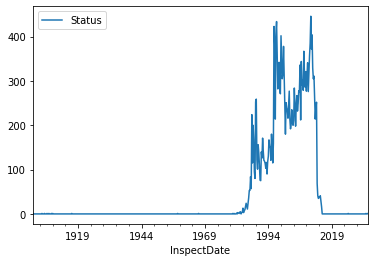

In [39]:
condemn.groupby(pd.Grouper(key="InspectDate", freq='Q')).count().plot()

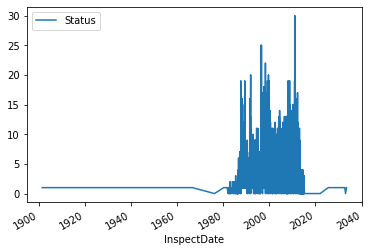

In [40]:
condemn.groupby("InspectDate").count().plot()